In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path to json
DATA_PATH = "/content/drive/MyDrive/datasets/Data/genres_original/data_10.json"

In [ ]:

def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y


In [ ]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
#X_train = X_train[..., np.newaxis]
#X_validation = X_validation[..., np.newaxis]
#X_test = X_test[..., np.newaxis]

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimiser, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 64)           19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=60, verbose=2)

Epoch 1/60
188/188 - 12s - loss: 1.7667 - accuracy: 0.3495 - val_loss: 1.6580 - val_accuracy: 0.4160 - 12s/epoch - 65ms/step
Epoch 2/60
188/188 - 2s - loss: 1.6415 - accuracy: 0.3937 - val_loss: 1.6025 - val_accuracy: 0.3980 - 2s/epoch - 10ms/step
Epoch 3/60
188/188 - 2s - loss: 1.4717 - accuracy: 0.4552 - val_loss: 1.4821 - val_accuracy: 0.4493 - 2s/epoch - 10ms/step
Epoch 4/60
188/188 - 3s - loss: 1.4226 - accuracy: 0.4706 - val_loss: 1.7764 - val_accuracy: 0.4447 - 3s/epoch - 15ms/step
Epoch 5/60
188/188 - 2s - loss: 1.3278 - accuracy: 0.5074 - val_loss: 1.3108 - val_accuracy: 0.5093 - 2s/epoch - 12ms/step
Epoch 6/60
188/188 - 2s - loss: 1.2204 - accuracy: 0.5616 - val_loss: 1.2696 - val_accuracy: 0.5340 - 2s/epoch - 11ms/step
Epoch 7/60
188/188 - 2s - loss: 1.1616 - accuracy: 0.5786 - val_loss: 1.2102 - val_accuracy: 0.5673 - 2s/epoch - 11ms/step
Epoch 8/60
188/188 - 2s - loss: 1.0874 - accuracy: 0.6031 - val_loss: 1.1519 - val_accuracy: 0.5867 - 2s/epoch - 10ms/step
Epoch 9/60
188

In [ ]:
import tensorflow as tf

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model2.add(tf.keras.layers.LSTM(64))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model2.compile(optimizer=optimiser, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# train model
history = model2.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=60, verbose=2)

Epoch 1/60
188/188 - 6s - loss: 2.1630 - accuracy: 0.2498 - val_loss: 2.0046 - val_accuracy: 0.3233 - 6s/epoch - 35ms/step
Epoch 2/60
188/188 - 2s - loss: 1.8592 - accuracy: 0.3715 - val_loss: 1.7305 - val_accuracy: 0.4180 - 2s/epoch - 10ms/step
Epoch 3/60
188/188 - 3s - loss: 1.6230 - accuracy: 0.4524 - val_loss: 1.5553 - val_accuracy: 0.4807 - 3s/epoch - 14ms/step
Epoch 4/60
188/188 - 2s - loss: 1.4779 - accuracy: 0.4956 - val_loss: 1.4581 - val_accuracy: 0.4953 - 2s/epoch - 12ms/step
Epoch 5/60
188/188 - 2s - loss: 1.3873 - accuracy: 0.5213 - val_loss: 1.4031 - val_accuracy: 0.5113 - 2s/epoch - 11ms/step
Epoch 6/60
188/188 - 2s - loss: 1.3246 - accuracy: 0.5481 - val_loss: 1.3986 - val_accuracy: 0.5033 - 2s/epoch - 11ms/step
Epoch 7/60
188/188 - 2s - loss: 1.2904 - accuracy: 0.5509 - val_loss: 1.3520 - val_accuracy: 0.5140 - 2s/epoch - 10ms/step
Epoch 8/60
188/188 - 2s - loss: 1.2301 - accuracy: 0.5733 - val_loss: 1.3114 - val_accuracy: 0.5300 - 2s/epoch - 11ms/step
Epoch 9/60
188/1

In [ ]:

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    fig.tight_layout()
    #plt.show()

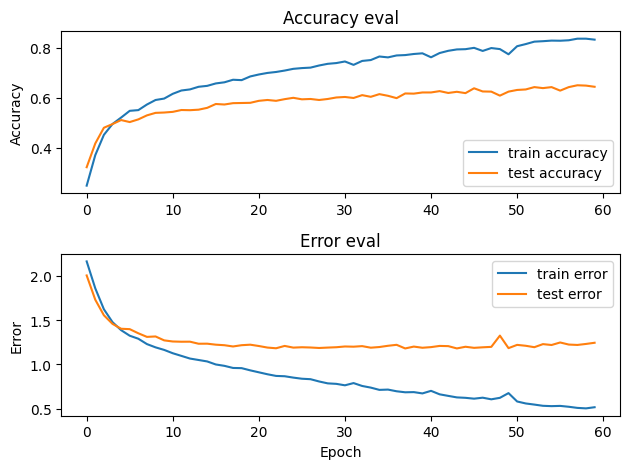

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)
plt.savefig("model4 plot")

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 1.1545 - accuracy: 0.6559 - 601ms/epoch - 8ms/step

Test accuracy: 0.6558623313903809


In [ ]:
model2.save("GTZAN_LSTM.h5")